# ANOVA

The following jupyter package is using the statistical method known as ANOVA to analyse a data set on diets.

1. data source for the ANOVA study https://www.sheffield.ac.uk/mash/statistics/datasets

2. Source for inforation on ANOVA https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

3. Paire t - test https://www.youtube.com/watch?v=DZyDbEzaiK0

4. Shapiro wilks test for normallity https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php

5. Levenes test for homegeneity https://en.wikipedia.org/wiki/Levene%27s_test#:~:text=In%20statistics%2C%20Levene's%20test%20is,samples%20are%20drawn%20are%20equal.

6. https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php


The data set shown below contains infomation on 78 people using 1 of 3 diets.

|Variable name|Variable|Data type|
|:-|:-:|:-:|
|Person|Participant number|   |
|Gender|1=male;0=female|Binary|
|Age|Age(years)|Scale|
|Height|Height(cm)|Scale|
|preweight|Weight before the diet|Scale|
|Diet|Diet|Binary|
|Wight loss 6 weeks|weight loss (kg)|Scale|
|Weight lost after 6 weeks|weight lost (kg)|Scale|

The following data was subsequently calculated for further manipulation

|Variable name|Variable|Data type|
|:-|:-:|:-:|
|Weight lost after 6 weeks|weight lost (kg)|Scale|
|Height in metres|Height(m)|Scale
|Body mass index pre weight|caluculated value|scale
|Body mass index 6 weeks|caluculated value|scale

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_rel

# here I am removing a nuicence error related to calculation of values using arrays.
pd.options.mode.chained_assignment = None

# setting the graph size
plt.rcParams["figure.figsize"] =(10,6)

In [2]:
# eyball the data
df = pd.read_csv('Diet.csv')
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [3]:
# after eyeballing the data we will drop the first 2 rows who appear to have not taken part in the study

In [4]:
remove = df["gender"] != " "
df = df[remove]

In [5]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [6]:
df['weight_lost'] = (df['pre.weight'] - df['weight6weeks'])

In [7]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_lost
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
5,4,0,33,171,64,1,61.1,2.9
6,5,0,50,170,65,1,62.2,2.8
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,2.8
74,75,1,49,177,84,3,79.9,4.1
75,76,1,28,164,85,3,79.7,5.3
76,77,1,40,167,87,3,77.8,9.2


In [8]:
df['height_m'] = (df['Height']/100)

In [9]:
df['BMI0'] = df['pre.weight']/(df['height_m']*df['height_m'])

In [10]:
df['BMI6']= df['weight6weeks']/(df['height_m']*df['height_m'])

In [11]:
df['deltaBMI']=df['BMI0']-df['BMI6']

In [12]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_lost,height_m,BMI0,BMI6,deltaBMI
2,1,0,22,159,58,1,54.2,3.8,1.59,22.942130,21.439025,1.503105
3,2,0,46,192,60,1,54.0,6.0,1.92,16.276042,14.648438,1.627604
4,3,0,55,170,64,1,63.3,0.7,1.70,22.145329,21.903114,0.242215
5,4,0,33,171,64,1,61.1,2.9,1.71,21.887076,20.895318,0.991758
6,5,0,50,170,65,1,62.2,2.8,1.70,22.491349,21.522491,0.968858
...,...,...,...,...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,2.8,1.83,24.784258,23.948162,0.836095
74,75,1,49,177,84,3,79.9,4.1,1.77,26.812219,25.503527,1.308692
75,76,1,28,164,85,3,79.7,5.3,1.64,31.603212,29.632659,1.970553
76,77,1,40,167,87,3,77.8,9.2,1.67,31.195095,27.896303,3.298792


In [13]:
dfdiet1 = df[df['Diet']==1]
dfdiet1

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_lost,height_m,BMI0,BMI6,deltaBMI
2,1,0,22,159,58,1,54.2,3.8,1.59,22.942130,21.439025,1.503105
3,2,0,46,192,60,1,54.0,6.0,1.92,16.276042,14.648438,1.627604
4,3,0,55,170,64,1,63.3,0.7,1.70,22.145329,21.903114,0.242215
5,4,0,33,171,64,1,61.1,2.9,1.71,21.887076,20.895318,0.991758
6,5,0,50,170,65,1,62.2,2.8,1.70,22.491349,21.522491,0.968858
7,6,0,50,201,66,1,64.0,2.0,2.01,16.336229,15.841192,0.495037
8,7,0,37,174,67,1,65.0,2.0,1.74,22.129740,21.469150,0.660589
9,8,0,28,176,69,1,60.5,8.5,1.76,22.275310,19.531250,2.744060
10,9,0,28,165,70,1,68.1,1.9,1.65,25.711662,25.013774,0.697888
11,10,0,45,165,70,1,66.9,3.1,1.65,25.711662,24.573003,1.138659


In [14]:
dfdiet2 = df[df['Diet']==2]
dfdiet2

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_lost,height_m,BMI0,BMI6,deltaBMI
16,27,0,44,174,58,2,60.1,-2.1,1.74,19.157088,19.850707,-0.693619
17,28,0,37,172,58,2,56.0,2.0,1.72,19.605192,18.929151,0.676041
18,29,0,41,165,59,2,57.3,1.7,1.65,21.671258,21.046832,0.624426
19,30,0,43,171,61,2,56.7,4.3,1.71,20.861120,19.390582,1.470538
20,31,0,20,169,62,2,55.0,7.0,1.69,21.707923,19.257029,2.450895
21,32,0,51,174,63,2,62.4,0.6,1.74,20.808561,20.610384,0.198177
22,33,0,31,163,63,2,60.3,2.7,1.63,23.711845,22.695623,1.016222
23,34,0,54,173,63,2,59.4,3.6,1.73,21.049818,19.846971,1.202847
24,35,0,50,166,65,2,62.0,3.0,1.66,23.588329,22.499637,1.088692
25,36,0,48,163,66,2,64.0,2.0,1.63,24.840980,24.088223,0.752757


In [15]:
dfdiet3 = df[df['Diet']==3]
dfdiet3

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_lost,height_m,BMI0,BMI6,deltaBMI
30,52,0,51,165,60,3,53.0,7.0,1.65,22.038567,19.467401,2.571166
31,53,0,35,169,62,3,56.4,5.6,1.69,21.707923,19.747208,1.960716
32,54,0,21,159,64,3,60.6,3.4,1.59,25.315454,23.970571,1.344884
33,55,0,22,169,65,3,58.2,6.8,1.69,22.758307,20.377438,2.380869
34,56,0,36,160,66,3,58.2,7.8,1.60,25.781250,22.734375,3.046875
35,57,0,20,169,67,3,61.6,5.4,1.69,23.458562,21.567872,1.890690
36,58,0,35,163,67,3,60.2,6.8,1.63,25.217359,22.657985,2.559374
37,59,0,45,155,69,3,61.8,7.2,1.55,28.720083,25.723205,2.996878
38,60,0,58,141,70,3,63.0,7.0,1.41,35.209497,31.688547,3.520950
39,61,0,37,170,70,3,62.7,7.3,1.70,24.221453,21.695502,2.525952


In [16]:
dfdiet1.describe()

,Person,Age,Height,pre.weight,Diet,weight6weeks,weight_lost,height_m,BMI0,BMI6,deltaBMI
count,24.000000,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.500000,40.875000,170.291667,72.875000,1.0,69.575000,3.300000,1.702917,25.433257,24.289059,1.144197
std,7.071068,9.728097,10.948413,8.383796,0.0,8.398356,2.240148,0.109484,4.229586,4.145944,0.788658
min,1.000000,22.000000,156.000000,58.000000,1.0,54.000000,-0.600000,1.560000,16.276042,14.648438,-0.212585
25%,6.750000,36.000000,164.500000,66.750000,1.0,63.825000,1.975000,1.645000,22.437340,21.509156,0.620738
50%,12.500000,40.500000,167.500000,72.000000,1.0,69.250000,3.050000,1.675000,25.433779,24.793388,1.065209
75%,18.250000,48.500000,173.250000,80.000000,1.0,74.825000,3.950000,1.732500,29.389136,28.365017,1.503218
max,24.000000,60.000000,201.000000,88.000000,1.0,84.500000,9.000000,2.010000,31.572071,29.721295,3.429355


In [17]:
dfdiet2.describe()

,Person,Age,Height,pre.weight,Diet,weight6weeks,weight_lost,height_m,BMI0,BMI6,deltaBMI
count,25.000000,25.000000,25.000000,25.000000,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,39.000000,39.200000,175.040000,70.280000,2.0,67.012000,3.268000,1.750400,23.142258,22.067405,1.074853
std,7.359801,9.785193,12.548174,7.882047,0.0,7.640262,2.464535,0.125482,3.462401,3.312672,0.805566
min,27.000000,16.000000,160.000000,58.000000,2.0,55.000000,-2.100000,1.600000,18.938916,18.013328,-0.693619
25%,33.000000,33.000000,165.000000,63.000000,2.0,60.300000,2.000000,1.650000,20.724838,19.390582,0.624426
50%,39.000000,39.000000,171.000000,71.000000,2.0,66.800000,3.500000,1.710000,21.707923,21.046832,1.151284
75%,45.000000,45.000000,182.000000,78.000000,2.0,72.700000,4.700000,1.820000,24.840980,24.088223,1.542700
max,51.000000,54.000000,199.000000,80.000000,2.0,81.400000,7.900000,1.990000,30.468750,28.398437,2.450895


In [18]:
dfdiet3.describe()

,Person,Age,Height,pre.weight,Diet,weight6weeks,weight_lost,height_m,BMI0,BMI6,deltaBMI
count,27.000000,27.000000,27.000000,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,65.000000,37.777778,167.259259,73.629630,3.0,68.481481,5.148148,1.672593,26.474285,24.586224,1.888061
std,7.937254,10.315535,9.709601,7.606415,0.0,8.242807,2.395568,0.097096,3.423474,3.220038,0.939506
min,52.000000,20.000000,141.000000,60.000000,3.0,53.000000,0.500000,1.410000,21.707923,19.467401,0.167062
25%,58.500000,31.000000,161.500000,68.000000,3.0,61.700000,3.450000,1.615000,24.483385,22.263145,1.289416
50%,65.000000,36.000000,169.000000,73.000000,3.0,68.900000,5.400000,1.690000,25.217359,23.970571,1.970553
75%,71.500000,46.000000,174.000000,78.000000,3.0,74.850000,7.000000,1.740000,28.727389,26.526458,2.585128
max,78.000000,58.000000,183.000000,88.000000,3.0,81.900000,9.200000,1.830000,35.209497,31.688547,3.520950


### Taking a visual look at the data

###### We are using the weight lost as the dependant variable here. Firstly we will look at the data set as a whole.

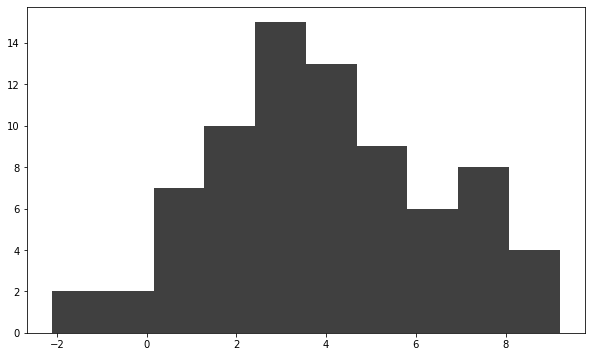

In [19]:
fig, ax = plt.subplots()
ax.hist(df['weight_lost'], bins=10, alpha = 0.75, label='Diet1',color='black');

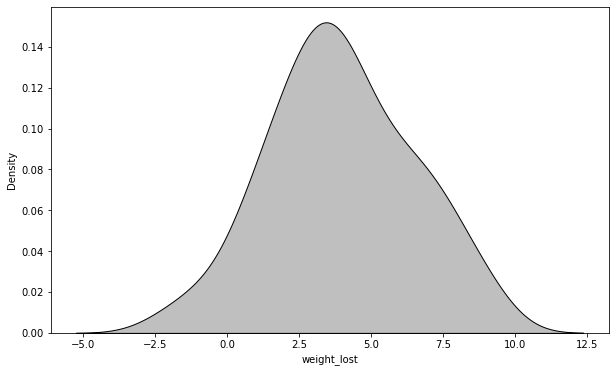

In [20]:
sns.kdeplot(df['weight_lost'],color='black', shade=True, label='All weight loss');

###### Now we are using the weight lost as the independant variable and the diet (type) as the independant.

<AxesSubplot:xlabel='Diet', ylabel='weight_lost'>

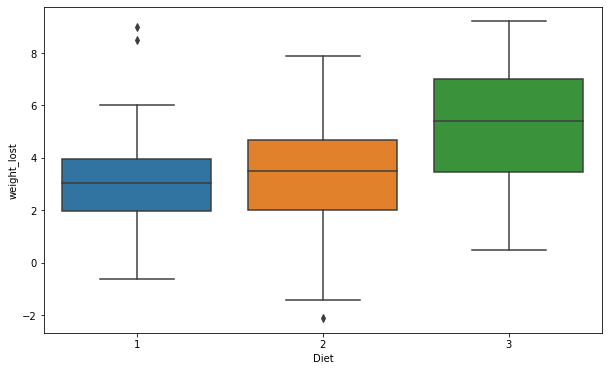

In [21]:
sns.boxplot(x=df['Diet'],y=df['weight_lost'], order =[1,2,3])

<AxesSubplot:xlabel='Diet', ylabel='deltaBMI'>

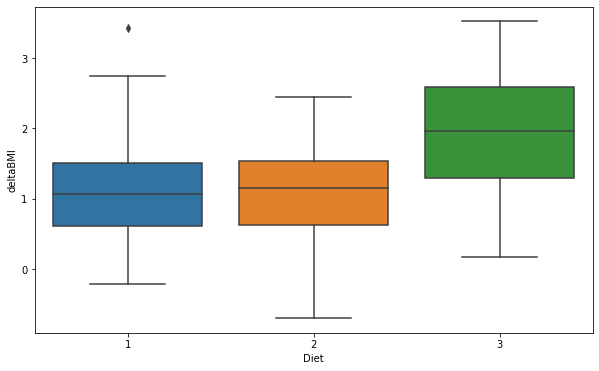

In [22]:
sns.boxplot(x=df['Diet'],y=df['deltaBMI'], order =[1,2,3])

In [23]:
# Having a look at the distibutions of the weight lost on each diet using a histogram and kde plot.

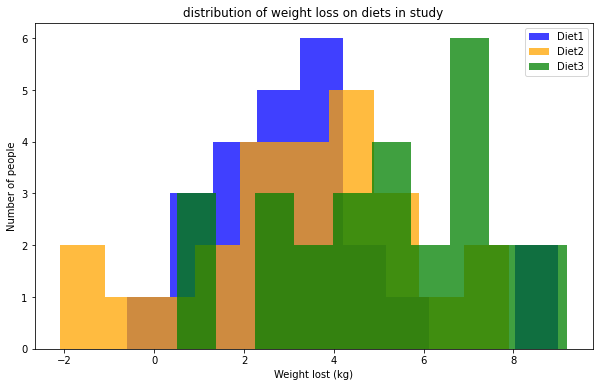

In [24]:
fig, ax = plt.subplots()

ax.hist(dfdiet1['weight_lost'], bins=10, alpha = 0.75, label='Diet1',color='blue');
ax.hist(dfdiet2['weight_lost'], bins=10, alpha = 0.75, label='Diet2',color='orange');
ax.hist(dfdiet3['weight_lost'], bins=10, alpha = 0.75, label='Diet3',color='green');
plt.xlabel('Weight lost (kg)')
plt.ylabel('Number of people')
plt.title('distribution of weight loss on diets in study')
plt.legend()
plt.show()


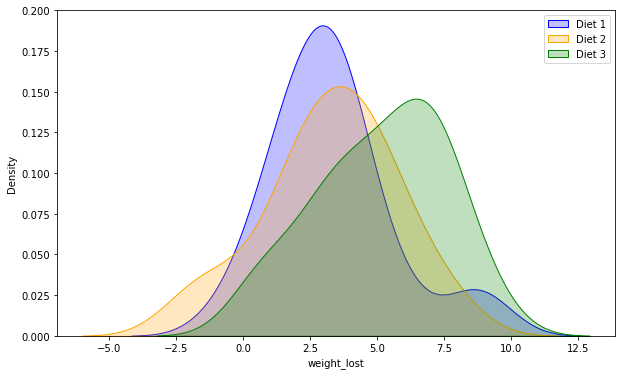

In [25]:
sns.kdeplot(dfdiet1['weight_lost'],color='blue', shade=True, label='Diet 1');
sns.kdeplot(dfdiet2['weight_lost'],color='orange', shade=True, label='Diet 2');
sns.kdeplot(dfdiet3['weight_lost'],color='green', shade=True, label='Diet 3');
plt.legend()
plt.show()

#### Paired t-test

Perform a paired t-test on each diet.

despite having cleaned up the data I have used the nan omit policy in order to ensure that any Nan values I have missed are ommitted for the calculation

In [26]:
ttest_rel(dfdiet1['pre.weight'],dfdiet1['weight6weeks'],nan_policy ='omit')

Ttest_relResult(statistic=7.216771317674052, pvalue=2.3967339414297313e-07)

In [27]:
ttest_rel(dfdiet2['pre.weight'],dfdiet2['weight6weeks'],nan_policy ='omit')

Ttest_relResult(statistic=6.630053635751579, pvalue=7.393920457261478e-07)

In [28]:
ttest_rel(dfdiet3['pre.weight'],dfdiet3['weight6weeks'],nan_policy ='omit')

Ttest_relResult(statistic=11.16668846353396, pvalue=2.030458889747232e-11)

###### Run the shapiro wilks test

In [29]:
stats.shapiro(dfdiet1['weight_lost'])

ShapiroResult(statistic=0.9255314469337463, pvalue=0.07748671621084213)

In [32]:
stats.shapiro(dfdiet2['weight_lost'])

ShapiroResult(statistic=0.9793620705604553, pvalue=0.8721737861633301)

In [31]:
stats.shapiro(dfdiet3['weight_lost'])

ShapiroResult(statistic=0.9601252675056458, pvalue=0.37203603982925415)

In [30]:
stats.levene(dfdiet1['weight_lost'],dfdiet2['weight_lost'] ,dfdiet3['weight_lost'], center='mean')

LeveneResult(statistic=0.4939161915199483, pvalue=0.6122563499426987)

###### Assumption 1

###### The first assumption we must satisfy is that dependant data is measured at the interval or ratio level. Our dependant variable will be the weight of the person either pre diet or post diet (or a measure of the loss). This assumption is satisfied.



###### Assumption 2

###### The independant variable here is the diet undertook by the participant. This assumption is satisfyied.



###### Assumption 3

###### We have three different diet regimes followed by the participants. Each participant follows one of the diets. This assumption is satisfied.



###### Assumption 4

###### The box and whisker plots indicste that there are som outlier with diets 1 and 2 in that (in the case of diet 1) there was an 'over performance' of the diet. However the subject of this study are human and knowing no more about the study it would wrong to remove these data points. For instance the diet could have been difficult to follow and these individuals were simply more capable of meeting the expectations than the rest of the cohort. Likewise with diet 2 (which only just sits outside the whisker boundary) it should not be removed with further information supplied to permit this (e.g the participant simply did not try)


###### Assumption 5

###### The data presented in graphs above (histogram and kde plot) demonstrate a tendancy toward Normal distribution. The shapiro wilks test also assures us that the Data can be considered Normal

###### Assumption 6

###### Levenes test for homgeniety fails with a value 0.61.
###### Welshes test 

### Summary table for assumptions

|Assumption number|Assumption|Comments|Criteria met?|
|:-:|:-:|:-:|:-:|
|1|Dependant data is ratio or interval|Weight used|yes|
|2|Independant variable is catagorical|Diet (1,2,3)|yes|
|3|Independance of observations|Participants can only undertake one diet|yes|
|4|No significant outliers|Although there apears to be outliers they do not sit alone. In the case of diet 1 there are two data points that sit outside the box and whisker boundarys, however they sit close together and as such I am not considering them significant outliers. |yes|
|5|Data tends towards Normal|The KDE plot also provides a picture of the data that would indicate the data tends to a relatively normal distribution|yes|
|6|Test for homgeneity|Levine test comes out greater than 0.05 therefor we reject the null hypothesis that the data ......|yes|


#### We will prooceed to perform the Anova test.